In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import sys
import os
import bungee
import cenote
import yaml
import pint

cenote.UREG.setup_matplotlib()

PATH = os.path.join(os.environ["SRC_DIR"], "examples", "115ft_30min.yaml")

plan = cenote.get_plan(PATH)
result = cenote.get_result(plan)

In [6]:
type(result.time)

pint.quantity.build_quantity_class.<locals>.Quantity

<IPython.core.display.Javascript object>


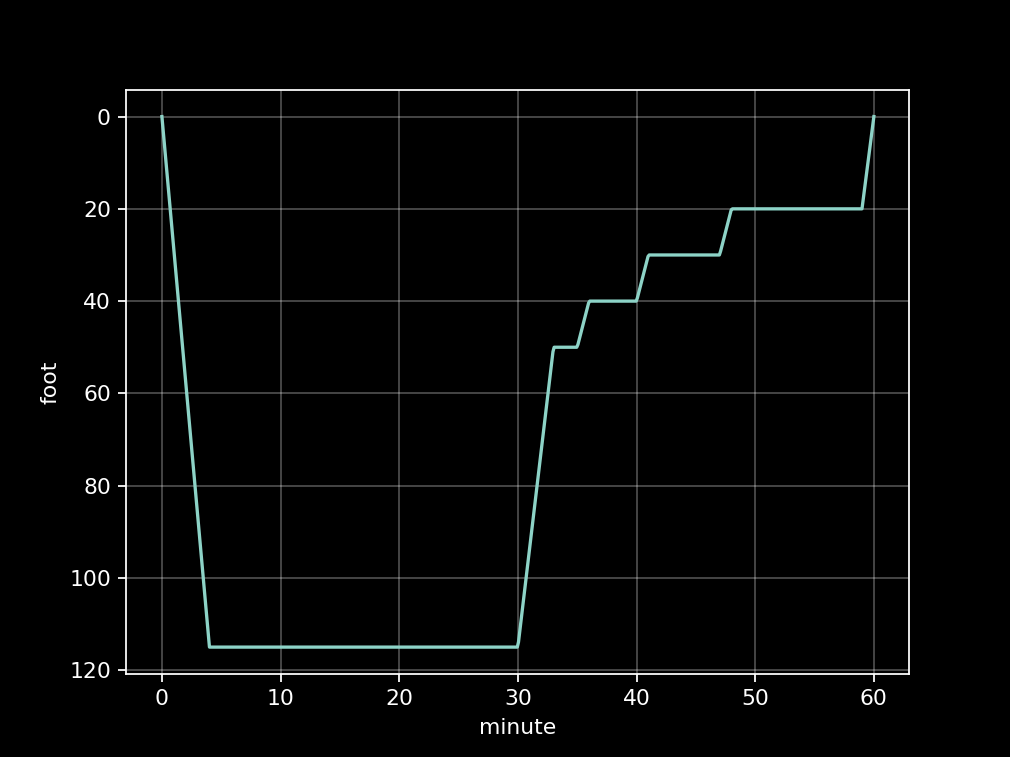

In [7]:

# Depth
plt.figure()
plt.plot(result.time, result.depth)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.title("Profile")

In [4]:

# # create the plan object
# plan = Plan(water, default_scr, tank_info, deco)

# ## profile
# # get a list of times in minutes
# durations = [
#     UREG.parse_expression(p["duration"]).to(config.TIME_UNIT).magnitude for p in data["profile"]
# ]
# times = [float(d) * config.TIME_UNIT for d in np.cumsum([0.0] + durations)]
# # get a list of depths
# depths = [0 * config.DEPTH_UNIT] + [UREG.parse_expression(p["depth"]) for p in data["profile"]]
# # scr points
# scrs = [
#     Scr(UREG.parse_expression(p["scr"])) if "scr" in p else None for p in data["profile"]
# ] + [None]
# # tank points
# tanks = [p["tank"] if "tank" in p else None for p in data["profile"]]
# tanks += [tanks[-1]]
# if tanks[0] is None:
#     raise Exception("First entry in profile must contain tank")

# N = len(times)

# # other checks
# assert len(depths) == N
# assert len(scrs) == N
# assert len(tanks) == N

# # populate the profile points
# for i in range(N):
#     plan.add_point(time=times[i], depth=depths[i], scr=scrs[i], tank_name=tanks[i])

# plan.validate()